## BigGAN 논문 리뷰

- GAN에서는 이미 고해상도 이미지 생성 성공
- but 복잡한 데이터셋에서 오는 다양한 샘플 학습은 해결하지 못함
- BigGAN에서는 laorge scale에 대해 학습한다.

- Generator에 orthogonal regularlization을 적용하는 것은 truncation trick을 사용
- fidelity 와 variety간의 trade-off를 조정


### Contribution
- 큰 scale 에서도 GAN을 사용할 수 있다.
1. general architectural changes -> imporve scalavility 
2. regularization scheme -> imporve conditioning

- GAN의 불안전한 요소들을 파악하기 위해 노력했고 다양한 실험이 진행되었음 하지만 무엇이 중점인지 잘 이해가 안됨..

## Core methods

1. Shared Embedding
2. Hirarchical latent space
3. Orthogonal Regularizaiton
4. Truncation Trick

### Sahred Embedding
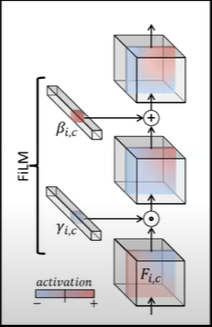// 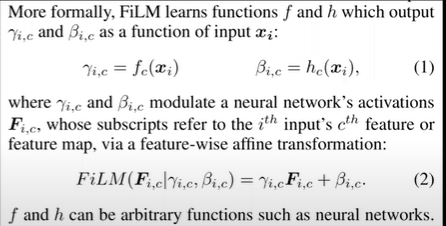
- 특정 네트워크에 conditioning을 진행할 때 embedding vector을 끼워넣는 방식을 사용
- linear한 각 layer마다 진행했음
- computation 과 memor cost가 줄어들고 trainign speed가 37% 증가하였음

### Hierarchical latent space
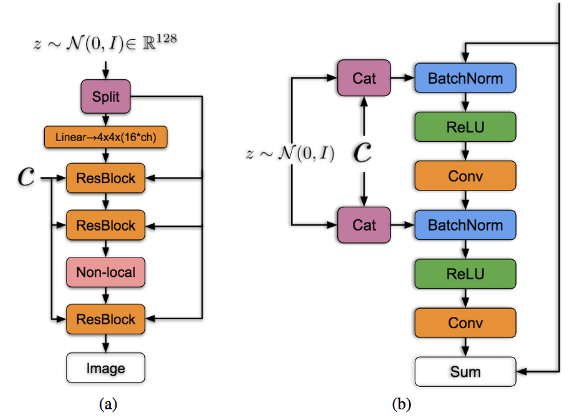

- Noise vector z를 여러개로 쪼개서 각 layer block마다 넣는다.
- imporves memory and compute costs
- procides performance improvement of 4%
- imporves training speed imporvent 18%

### Truncation Trick
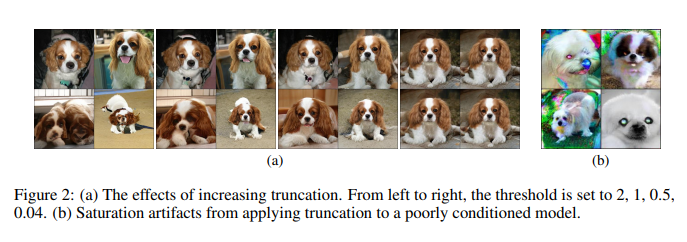

- 특정 threshold 밖으로 나가는 z를 다시 resampling하는 방식이다.
- 왼쪽으로 오른쪽으로 가면서 treshold를 줄여나간다. 점점 비슷한 이미지만 나오는 방식
- (b)와 같은 경우를 보면 truncation trick이 잘 적용되지 않은 경우도 볼 수있다.

- 위와 같은 문제를 해결하기 위해 제안된 것이 바로 Orthogonal Regularization이다!!

### Orthogonal Regularization
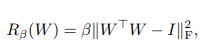

- singular vector들이 1로 제한되고 있기 때문에 안좋은 방식이다.

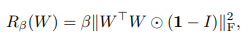
- 때문에 변환한 식이 이것으로 판단됨
- 원래는 trucation 적용률이 16% 였지만 Orthogonal Regularization 이후 60%로 증가

## 평가 방식
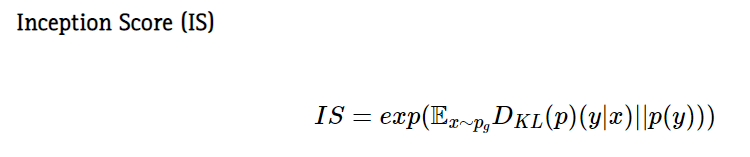
- 높을 수록 좋다.
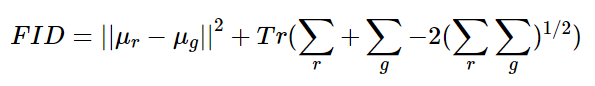
- 낮을 수록 좋다.

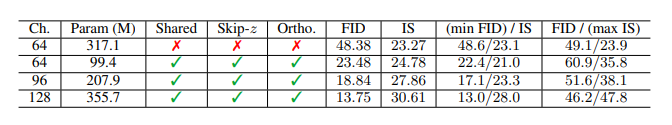
- Batch Experiment : size만 증가시켜도 매우 좋아짐, 한 batch에서 mode가 여러개가 나올 수 있기 때문에 gradient가 잘 표현되서 성능이 좋아 진 것으로 판단됨

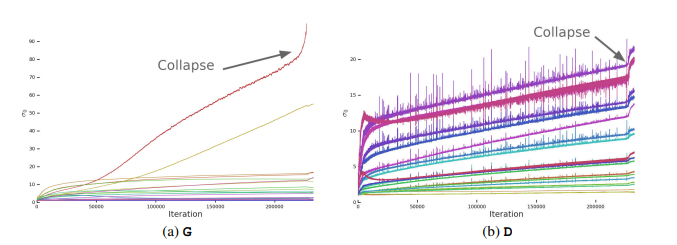
- 왼쪽 generator, 오른쪽 discrminator

- 각 weight마다 첫번쨰 singular value가 매우 중요하다.
- 왼쪽 그래프는 첫번째 singular value값에 대한 lteration 증가에 상응하는 값이다.
- 값자기 늘어나는 부근에서 model collapse가 일어났다고 한다. 실제로 실험상에도 training flex가 일어난 부분과 동일하다.

- singular value를 cramping 하는 방식으로 collapse를 방지하기 위한 실험도 동시에 진행했으나 유의미한 결과를 만들지 못함

### class leakage
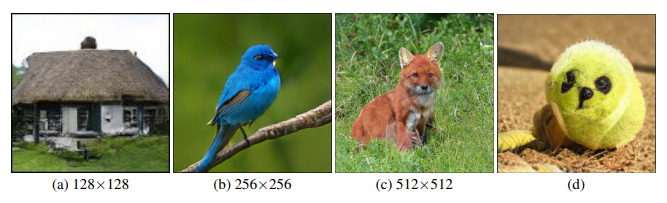

- 다른 클래스가 다른 클래스 생성에 참여하는 잘못된 현상
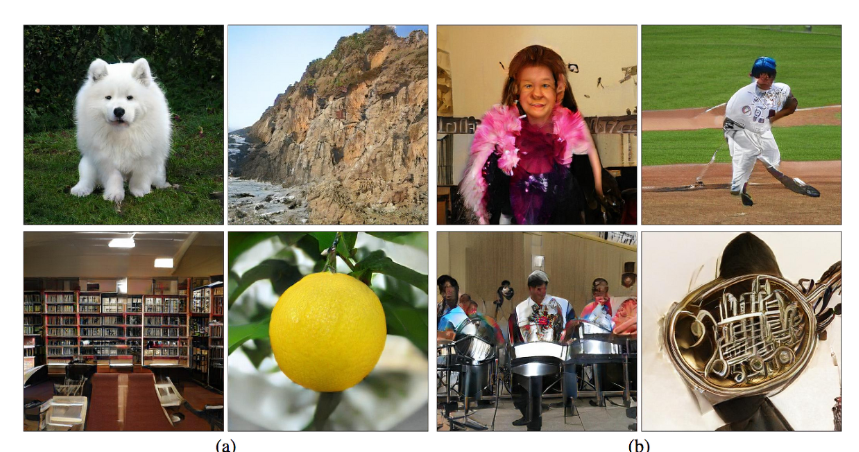
- 인물 라벨은 깔끔하게 생성하지 못하는 것을 보여준다

### JFT-3000M
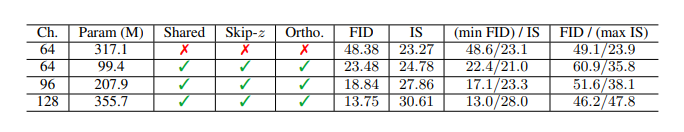
- ImageNet이 아닌 데이터 셋 공개되지 않은 구글 데이터셋
- 채널수가 늘리면 늘릴 수록 FID,IS 모두 imporve하는 현상을 보여줌
- 하지만 imageNet은 아무리 늘려도 96%정도에 멈추는 것을 보아 데이터셋에 따라 채널수 의 성능 향상이 다른 것으로 보인다.

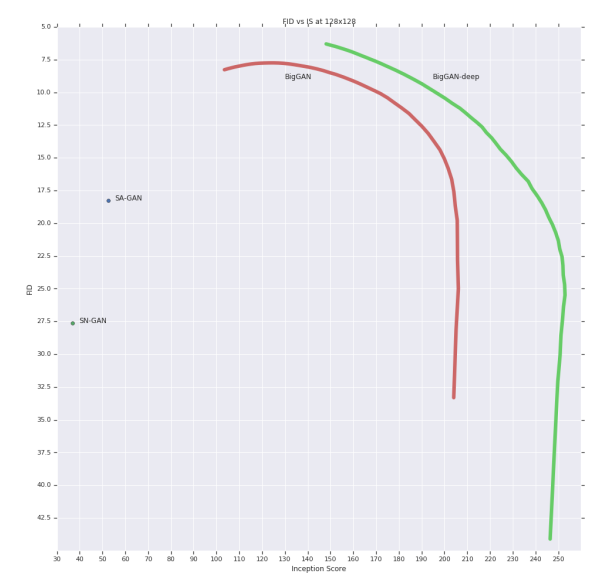

- Trucation Trick에서 시그마값을 계속 해서 바꾸면서 scaling을 진행하여 BigGAN의 성능을 측정한 것으로 보임.